In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('aurangabad_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,RF,TOT-RF,date,day,month,year
0,Aurangabad,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,...,23.80,1.14,200.78,712.83,0.0,0.0,2019-01-01,1,1,2019
1,Aurangabad,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,...,26.41,1.40,186.57,652.32,0.0,0.0,2019-02-01,2,1,2019
2,Aurangabad,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,...,27.75,1.35,187.25,662.91,0.0,0.0,2019-03-01,3,1,2019
3,Aurangabad,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,...,30.61,1.48,178.47,673.39,0.0,0.0,2019-04-01,4,1,2019
4,Aurangabad,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,...,35.48,1.74,149.55,659.10,0.0,0.0,2019-05-01,5,1,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City']
data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1551 non-null   float64       
 1   PM10         1551 non-null   float64       
 2   NO           1551 non-null   float64       
 3   NO2          1551 non-null   float64       
 4   NOx          1551 non-null   float64       
 5   NH3          1551 non-null   float64       
 6   SO2          1551 non-null   float64       
 7   CO           1551 non-null   float64       
 8   Ozone        1551 non-null   float64       
 9   Benzene      1551 non-null   float64       
 10  Toluene      1551 non-null   float64       
 11  Eth-Benzene  1551 non-null   float64       
 12  MP-Xylene    1551 non-null   float64       
 13  O            1551 non-null   float64       
 14  RH           1551 non-null   float64       
 15  WS           1551 non-null   float64       
 16  WD    

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
Toluene        0
Eth-Benzene    0
MP-Xylene      0
O              0
RH             0
WS             0
WD             0
SR             0
RF             0
TOT-RF         0
date           0
day            0
month          0
year           0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Toluene        False
Eth-Benzene    False
MP-Xylene      False
O              False
RH             False
WS             False
WD             False
SR             False
RF             False
TOT-RF         False
date           False
day            False
month          False
year           False
dtype: bool

In [6]:
data.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,RF,TOT-RF,date,day,month,year
0,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,0.21,...,23.80,1.14,200.78,712.83,0.0,0.0,2019-01-01,1,1,2019
1,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,0.26,...,26.41,1.40,186.57,652.32,0.0,0.0,2019-02-01,2,1,2019
2,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,0.21,...,27.75,1.35,187.25,662.91,0.0,0.0,2019-03-01,3,1,2019
3,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,0.20,...,30.61,1.48,178.47,673.39,0.0,0.0,2019-04-01,4,1,2019
4,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,0.26,...,35.48,1.74,149.55,659.10,0.0,0.0,2019-05-01,5,1,2019


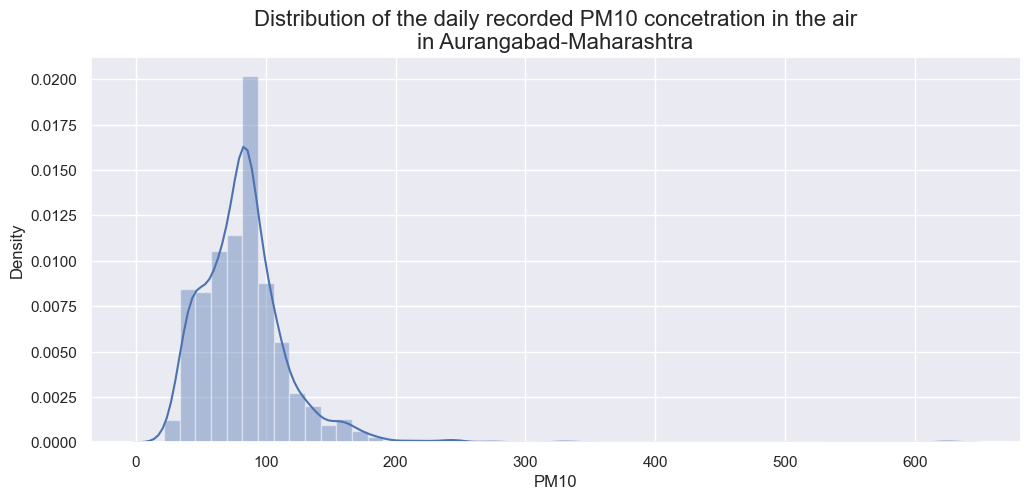

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM10'],bins=50)
plt.title('Distribution of the daily recorded PM10 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [8]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM10']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM10'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM10']

# display the resulting DataFrame
print(monthly_average)

       median_PM10
month             
1             99.3
2             86.0
3             85.3
4             85.3
5             76.6
6             73.0
7             70.4
8             56.0
9             60.5
10            75.5
11            84.8
12            95.0


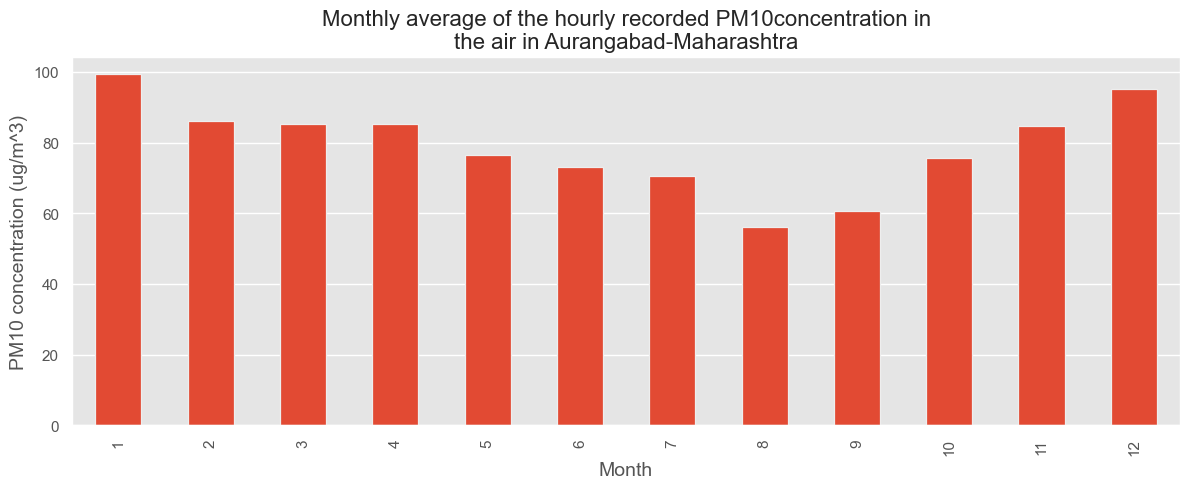

In [9]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM10 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM10concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

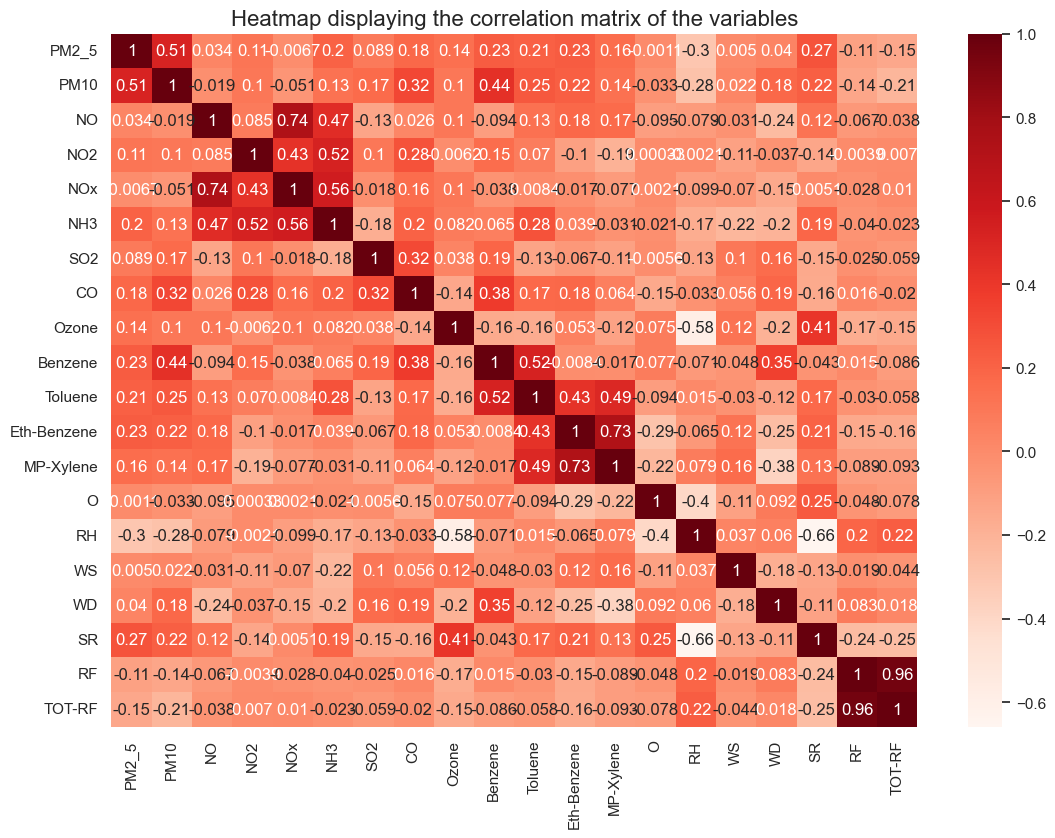

In [10]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','Eth-Benzene','MP-Xylene','O','RH','WS','WD','SR','RF','TOT-RF']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [11]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          310.478172
PM2_5            1.509649
PM10             1.845012
NO               3.145742
NO2              2.015541
NOx              3.628316
NH3              2.716156
SO2              1.379272
CO               1.713104
Ozone            1.939060
Benzene          2.887672
Toluene          2.989158
Eth-Benzene      2.713945
MP-Xylene        3.139197
O                1.546798
RH               3.308411
WS               1.240700
WD               1.759553
SR               2.501728
RF              15.048216
TOT-RF          15.498501
dtype: float64

In [12]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,O,RH,WS,WD,SR,RF,TOT-RF
0,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,0.21,0.00,10.45,0.62,22.11,23.80,1.14,200.78,712.83,0.0,0.0
1,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,0.26,0.00,13.15,0.90,22.72,26.41,1.40,186.57,652.32,0.0,0.0
2,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,0.21,0.00,7.83,0.44,23.36,27.75,1.35,187.25,662.91,0.0,0.0
3,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,0.20,0.00,13.26,0.65,23.42,30.61,1.48,178.47,673.39,0.0,0.0
4,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,0.26,11.67,8.76,0.40,23.27,35.48,1.74,149.55,659.10,0.0,0.0


In [13]:
#

In [14]:
columns_to_drop = ['RH','WS','WD','SR','RF','TOT-RF']

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const          100.936664
PM2_5            1.468484
PM10             1.740691
NO               3.132428
NO2              1.905275
NOx              3.579863
NH3              2.442390
SO2              1.313348
CO               1.614912
Ozone            1.220799
Benzene          2.464744
Toluene          2.794106
Eth-Benzene      2.610045
MP-Xylene        2.770309
O                1.145720
dtype: float64

In [15]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM10'] = np.log(newdata['PM10'])

In [16]:
mul_reg = formula.ols(formula="PM10 ~ PM2_5  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone + O + Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          6.47e-225
Time:                        12:23:08   Log-Likelihood:                -168.19
No. Observations:                1551   AIC:                             364.4
Df Residuals:                    1537   BIC:                             439.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5405      0.069     51.453      0.000       3.406       3.676
PM2_5           0.0080      0.000     20.430      0.000       0.007       0.009
NO              0.0011      0.001      1.331      0.183      -0.001       0.003
NO2             0.0022      0.001      2.442      0.015       0.000       0.004
NOx            -0.0045      0.001     -3.941      0.000      -0.007      -0.002
NH3             0.0017      0.002      1.105      0.269      -0.001       0.005
SO2             0.0030      0.001      2.919      0.004       0.001       0.005
CO              0.0975      0.028      3.430      0.001       0.042       0.153
Ozone           0.0026      0.000      6.892      0.000       0.002       0.003
O               0.0414      0.003     14.400      0.000       0.036       0.047
Benzene        -0.0033      0.001     -5.176      0.000      -0.005      -0.002
Toluene         0.0213      0.004      5.887      0.000       0.014       0.028
Eth_Benzene     0.0079      0.002      4.268      0.000       0.004       0.012
MP_Xylene       0.0011      0.002      0.526      0.599      -0.003       0.005
==============================================================================
Omnibus:                      429.929   Durbin-Watson:                   0.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7230.354
Skew:                          -0.837   Prob(JB):                         0.00
Kurtosis:                      13.444   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM10',axis=1)
y = newdata['PM10']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM2_5,NO,NO2,NOx,NH3,SO2,CO,Ozone,O,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,-0.061021,0.730783,-0.189842,-0.209229,1.264349,-0.894764,1.303075,1.417256,-0.892456,-0.835907,2.042481,-0.924886,-2.029139
1,1.480196,4.843214,-0.295517,3.361320,2.823172,-0.991731,1.990627,1.530031,-0.878373,-0.835907,2.923806,-0.879572,-1.863396
2,-0.393132,0.533829,-0.140847,-0.395665,1.168854,-0.499035,-0.039289,2.393808,-0.892456,-0.835907,1.187269,-0.954016,-1.689502
3,0.383825,0.545295,-0.174471,-0.193325,1.189919,-0.599932,1.499518,1.805482,-0.895273,-0.835907,2.959712,-0.920031,-1.673199
4,-0.069654,0.551366,-0.159100,-0.370041,1.192728,-0.696899,0.386339,2.223647,-0.878373,-0.191801,1.490837,-0.960490,-1.713956


In [18]:
y.head()

0    4.815998
1    5.075236
2    4.895449
3    4.843872
4    4.957656
Name: PM10, dtype: float64

In [19]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [20]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.5925121344287294

Score on test data: 0.18462487655008997


In [21]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.12277827074994883

Overall model accuracy: 0.18462487655008997


In [22]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM10',axis=1)
y = ensemble_data['PM10']

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [24]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [25]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.7963376911152881

Score on test data: 0.16026141759509027

Root Mean Squared Error: 35.64459808260076

Overall model accuracy: 0.16026141759509027


In [26]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [27]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.7342973419573184

Score on test data: 0.31927307626441037

Best parameters found:


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2}

Root Mean Squared Error: 32.092838620031365

Overall model accuracy: 0.31927307626441037


In [28]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree_10.xlsx')

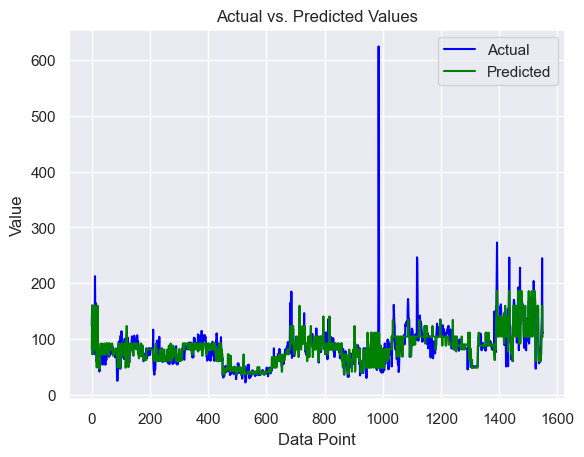

In [44]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, dtpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

In [29]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [30]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8490856531899224

Score on test data: 0.3844038244840525

Root Mean Squared Error: 30.518952608363673

Overall model accuracy: 0.3844038244840525


In [31]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [32]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.8116415944156493

Score on test data: 0.3820608207332947

Best parameters found:


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 7}

Root Mean Squared Error: 30.576976125377932

Overall model accuracy: 0.3820608207332947


In [33]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest_10.xlsx')

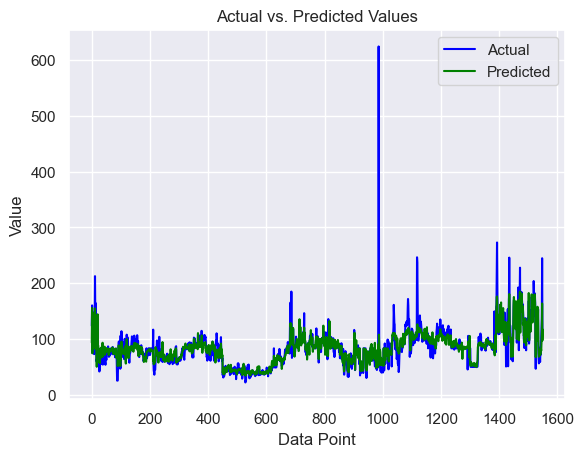

In [43]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, rfpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

In [34]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [35]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9934492107030191

Score on test data: 0.37457707672438356

Root Mean Squared Error: 30.761574871875155

Overall model accuracy: 0.37457707672438356


In [36]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [37]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.8291928529789534

Score on test data: 0.3734618725763126

Best parameters found:


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 3,
 'learning_rate': 0.1}

Root Mean Squared Error: 30.788988447204567

Overall model accuracy: 0.3734618725763126


In [41]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost_10.xlsx')

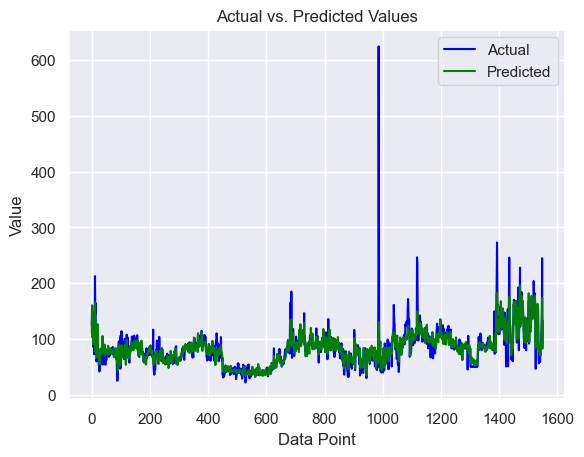

In [42]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, xgpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()
    

In [39]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1551 1551


In [40]:
"""
# we now use the best model (GradientBoostingRegressor model) to predict the PM2.5 
# concetration and compare it to the actual PM2.5 recorded in the data by means of
# visualization

compare_data = pd.DataFrame({'dates':data['date'],
                            'Actual PM2.5':y,
                            'Predicted PM2.5':gboost_search.predict(X.values)})

compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)

# let's plot the daily averages of the Actual PM10 and the predicted PM2.5 concentration.
compare_data = compare_data.resample('D').mean()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,5))
    plt.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',
               alpha=.6)
    plt.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',
               alpha=.6)
    plt.legend()
    plt.title('Evaluating the GradientBoostingRegressor model\n(model accuracy = 93%)',
             fontsize=18)
    plt.xlabel('period',fontsize=15)
    plt.ylabel('PM2.5 concentration',fontsize=15)
    plt.show()


"""

"\n# we now use the best model (GradientBoostingRegressor model) to predict the PM2.5 \n# concetration and compare it to the actual PM2.5 recorded in the data by means of\n# visualization\n\ncompare_data = pd.DataFrame({'dates':data['date'],\n                            'Actual PM2.5':y,\n                            'Predicted PM2.5':gboost_search.predict(X.values)})\n\ncompare_data.set_index('dates',inplace=True)\ncompare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)\n\n# let's plot the daily averages of the Actual PM10 and the predicted PM2.5 concentration.\ncompare_data = compare_data.resample('D').mean()\n\nwith plt.style.context('fivethirtyeight'):\n    plt.figure(figsize=(12,5))\n    plt.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',\n               alpha=.6)\n    plt.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',\n               alpha=.6)\n    plt.legend()\n    plt.title('Evalua